# Fase 2: Análisis Exploratorio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

Cargamos el data set limpio

In [3]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv'
df = pd.read_csv(url)

¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?
Veamos los canales más utilizads y el ROI por canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\2618559784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')


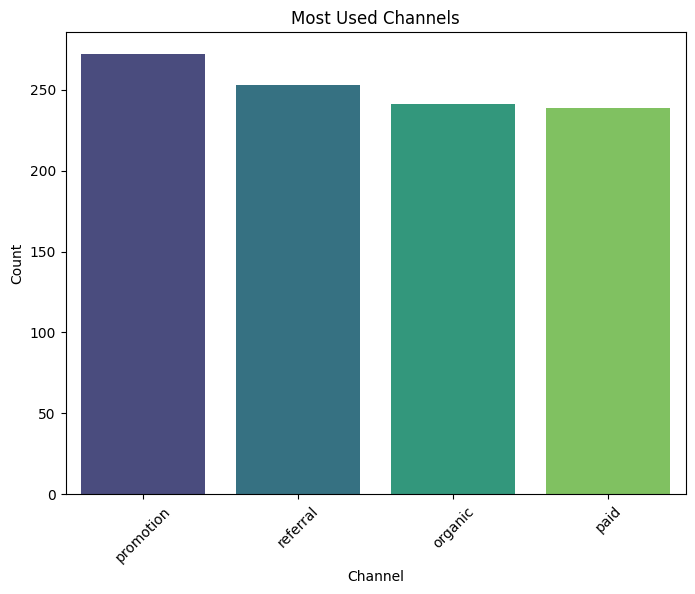

In [4]:
# Count the occurrences of each channel
channel_counts = df['channel'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')
plt.title('Most Used Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Veamos la combinación de frecuencia de uso y de rendimiento de cada canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\2632751192.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\2632751192.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


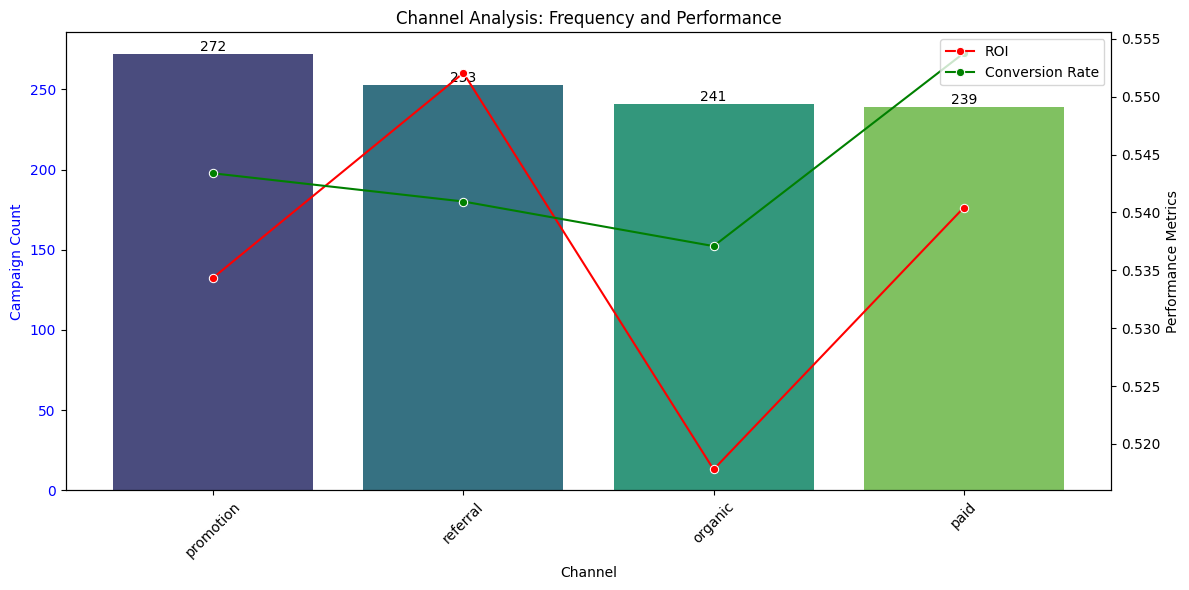

      channel          type       roi  conversion_rate      revenue  \
0     organic         email  0.532353         0.565882  40974485.04   
1     organic       podcast  0.554898         0.485714  24589991.93   
2     organic  social media  0.482833         0.531667  37198381.85   
3     organic       webinar  0.506719         0.550937  31051312.96   
4        paid         email  0.528923         0.510923  35400349.85   
5        paid       podcast  0.501404         0.560526  29346598.78   
6        paid  social media  0.582031         0.549375  34304978.67   
7        paid       webinar  0.546226         0.604340  28013391.00   
8   promotion         email  0.507143         0.569091  36798700.54   
9   promotion       podcast  0.565738         0.511803  33508326.29   
10  promotion  social media  0.541636         0.532909  24900015.10   
11  promotion       webinar  0.531646         0.550000  41295462.35   
12   referral         email  0.544203         0.529275  33671814.01   
13   r

In [5]:
# Group by channel and calculate metrics
channel_analysis = df.groupby('channel').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Sort by campaign count for frequency
channel_analysis = channel_analysis.sort_values(by='campaign_count', ascending=False)

# Plot frequency and performance metrics
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for frequency
sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Campaign Count', color='blue')
ax1.set_xlabel('Channel')
ax1.set_title('Channel Analysis: Frequency and Performance')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i in ax1.containers:
    ax1.bar_label(i,)

# Line plot for ROI and conversion rate
ax2 = ax1.twinx()
sns.lineplot(x='channel', y='roi', data=channel_analysis, marker='o', color='red', label='ROI', ax=ax2)
sns.lineplot(x='channel', y='conversion_rate', data=channel_analysis, marker='o', color='green', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Performance Metrics', color='black')
ax2.tick_params(axis='y', labelcolor='black')


# Add legend
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Segment analysis by campaign type or audience
segment_analysis = df.groupby(['channel', 'type']).agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

print(segment_analysis)

Podemos ver que el canal que se utiliza con más frecuencia es "promotion" y el que tiene el mejor ROI es "Referral", que es a su vez el segundo más utilizado

Ahora veamos los diferentes tipos de campaña para identificar cuáles generan más ingresos y tienen mejor tasa de conversión.

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\1131673963.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='revenue', data=campaign_type_analysis, palette='viridis', ax=ax1)
C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\1131673963.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


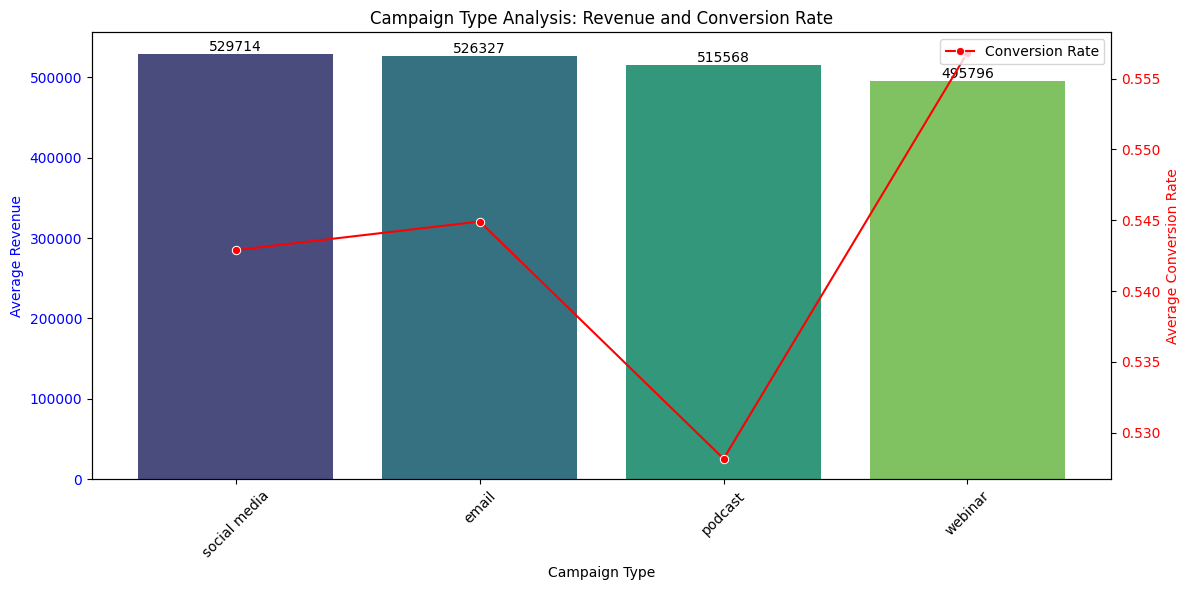

           type        revenue  conversion_rate  campaign_count
2  social media  529713.587191         0.542894             235
0         email  526327.417348         0.544910             279
1       podcast  515567.689127         0.528166             229
3       webinar  495795.526985         0.556832             262


In [6]:
# Agrupar por tipo de campaña y calcular métricas relevantes
campaign_type_analysis = df.groupby('type').agg({
    'revenue': 'mean',
    'conversion_rate': 'mean',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Ordenar por ingresos promedio
campaign_type_analysis = campaign_type_analysis.sort_values(by='revenue', ascending=False)

# Visualizar los resultados
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para ingresos promedio
sns.barplot(x='type', y='revenue', data=campaign_type_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Average Revenue', color='blue')
ax1.set_xlabel('Campaign Type')
ax1.set_title('Campaign Type Analysis: Revenue and Conversion Rate')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i in ax1.containers:
    ax1.bar_label(i,)

# Gráfico de línea para tasa de conversión promedio
ax2 = ax1.twinx()
sns.lineplot(x='type', y='conversion_rate', data=campaign_type_analysis, marker='o', color='red', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Average Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar la tabla de análisis
print(campaign_type_analysis)

Podemos ver que las campañas de social media generan los mayores ingresos promedio y los webinars tienen la tasa de conversion mas alta

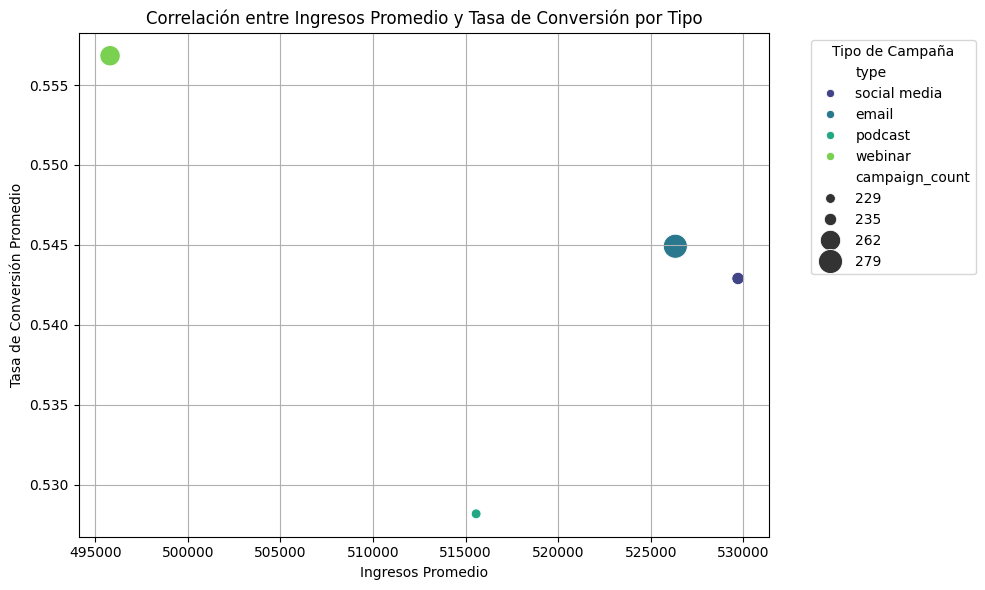

In [7]:
# Diagrama de dispersión para correlación entre ingresos promedio y tasa de conversión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='revenue', 
    y='conversion_rate', 
    hue='type', 
    size='campaign_count', 
    sizes=(50, 300), 
    data=campaign_type_analysis, 
    palette='viridis'
)

plt.title('Correlación entre Ingresos Promedio y Tasa de Conversión por Tipo')
plt.xlabel('Ingresos Promedio')
plt.ylabel('Tasa de Conversión Promedio')
plt.legend(title='Tipo de Campaña', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver, que salvo para el canal webinar, para el resto vemos que hay una correlación directa entre ingresos promedio y tasa de conversión

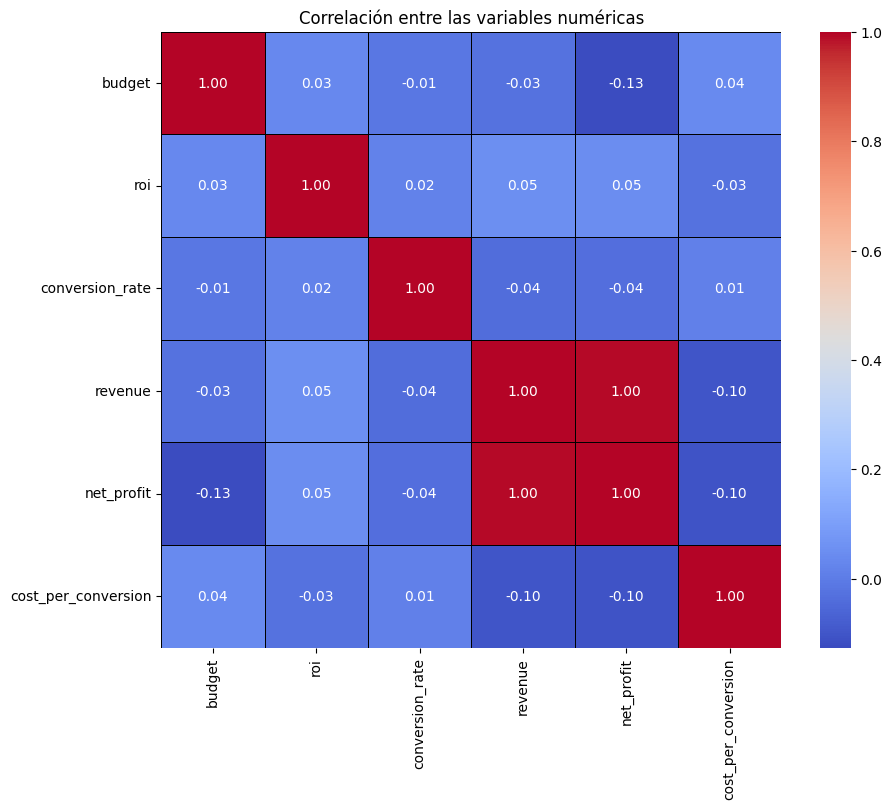

In [8]:
plt.figure(figsize=(10,8))
#sns.heatmap(df.select_dtypes(include='number', exclude='datetime').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
sns.heatmap(data=df[df['type'] != 'webinar'].select_dtypes(include='float').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlación entre las variables numéricas')
plt.show()

No se ve una correlación directa entre esas variables aunque esperaba ver una correlación entre revenue y conversion rate expecto para las campañas de tipo webinar.

Vamos a ver la relación del ROI con otroas variables del dataset

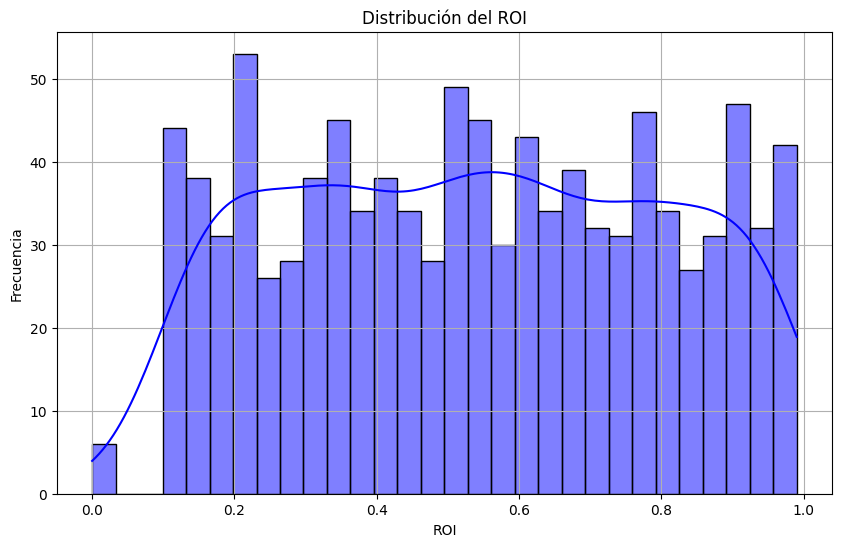

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\3993382229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values, palette='viridis')


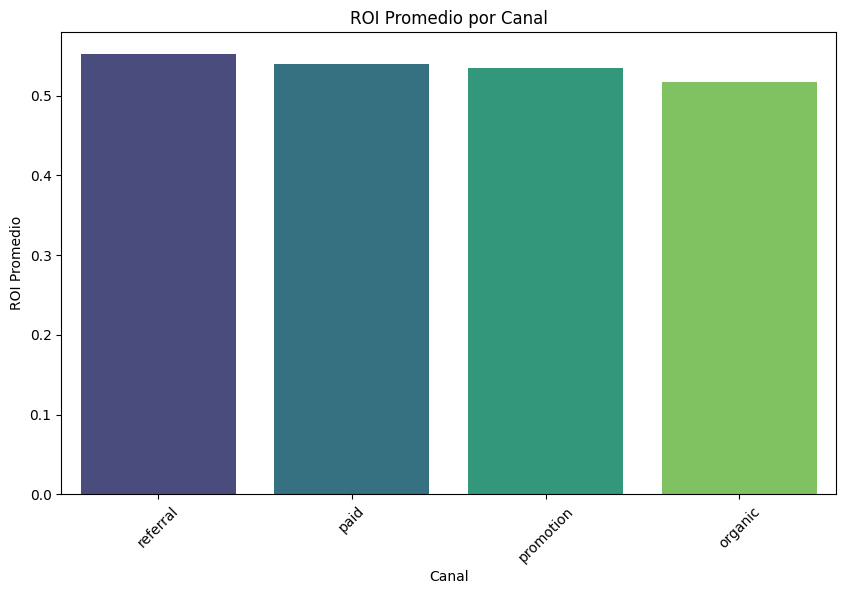

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\3993382229.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_campaign_type.index, y=roi_by_campaign_type.values, palette='viridis')


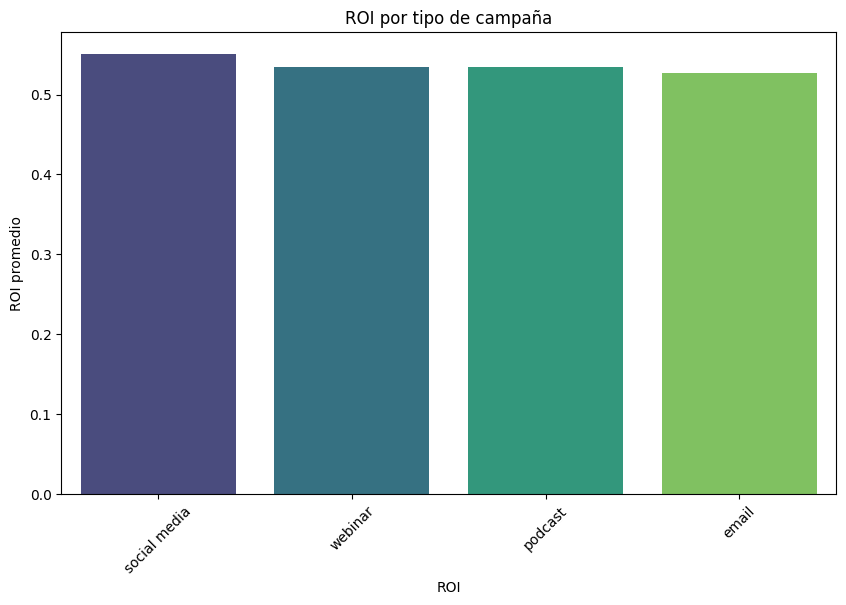

In [9]:
# Visualizar la distribución del ROI
plt.figure(figsize=(10, 6))
sns.histplot(df['roi'], kde=True, bins=30, color='blue')
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Analizar el ROI promedio por canal
roi_by_channel = df.groupby('channel')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values, palette='viridis')
plt.title('ROI Promedio por Canal')
plt.xlabel('Canal')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)
plt.show()

# Analizar el ROI promedio por tipo de campaña
roi_by_campaign_type = df.groupby('type')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=roi_by_campaign_type.index, y=roi_by_campaign_type.values, palette='viridis')
plt.title('ROI por tipo de campaña')
plt.xlabel('ROI')
plt.ylabel('ROI promedio')
plt.xticks(rotation=45)
plt.show()

vamos a ver si hay diferencias significativas en el comportamiento de las audiencias B2b y B2C

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\1164466904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['target_audience'], y=df['roi'], palette='viridis')


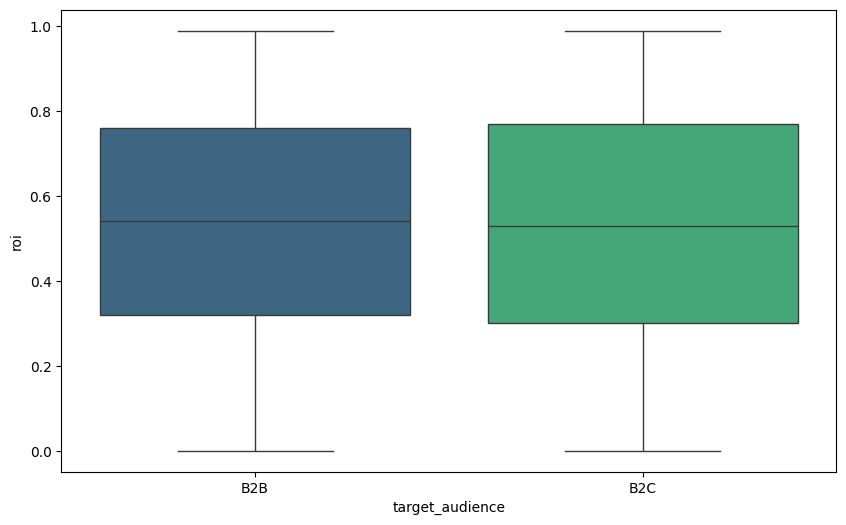

In [10]:
# Compara las tasas de conversión entre los dos tipos de audiencia para determinar si existen diferencias en el comportamiento de compra
#roi_by_audience = df.groupby('target_audience')['roi'].mean()
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=df['target_audience'], y=df['roi'], palette='viridis')
plt.show()




<Figure size 1200x600 with 0 Axes>

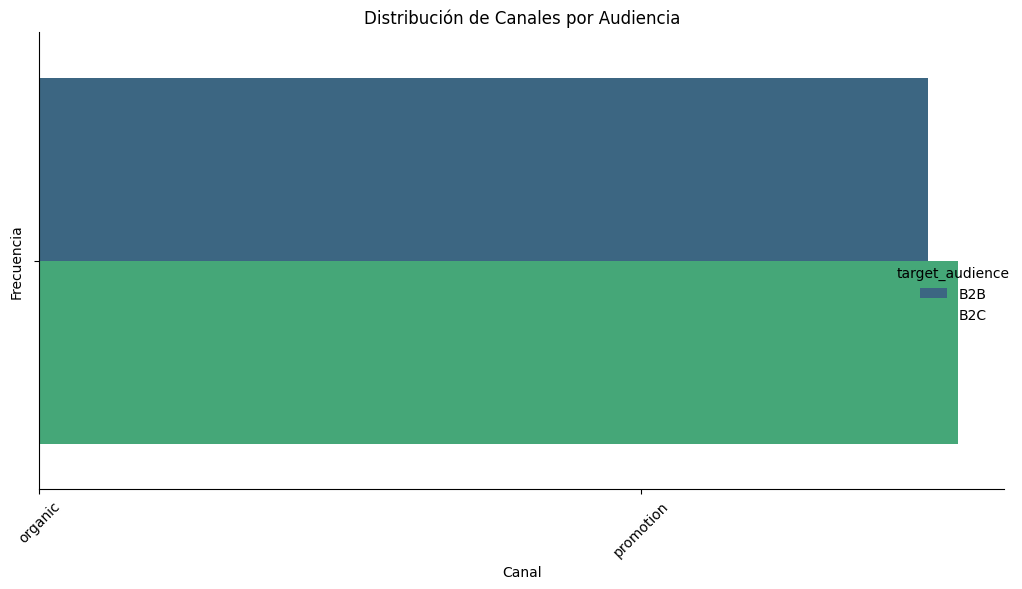

<Figure size 1200x600 with 0 Axes>

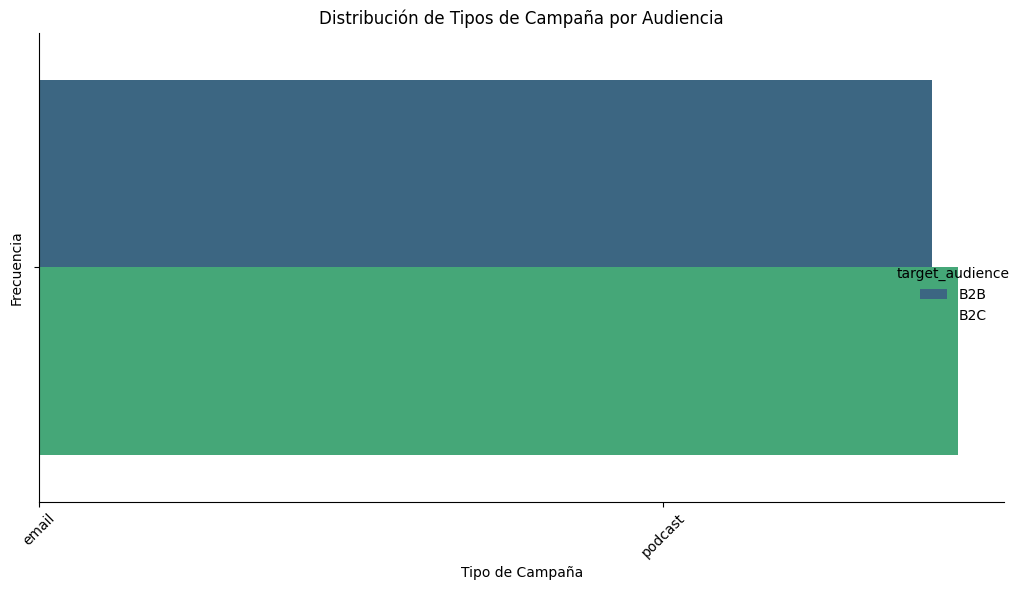

In [11]:
# Gráfico de barras agrupado por audiencia y canal
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df,
    x='channel',
    hue='target_audience',
    kind='bar',
    errorbar=None,
    palette='viridis',
    height=6,
    aspect=1.5
)
plt.title('Distribución de Canales por Audiencia')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras agrupado por audiencia y tipo de campaña
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df,
    x='type',
    hue='target_audience',
    kind='bar',
    errorbar=None,
    palette='viridis',
    height=6,
    aspect=1.5
)
plt.title('Distribución de Tipos de Campaña por Audiencia')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vamos a ver ahora las campañas que tienen mayor beneficio neto

Top 10 campañas según beneficio neto:
                                campaign_name  net_profit          type  \
492            Advanced systematic complexity   987859.73       podcast   
880              Balanced optimizing software   987359.82       podcast   
699            Object-based didactic intranet   979827.40  social media   
203  Reverse-engineered static infrastructure   974958.97         email   
193       Sharable upward-trending initiative   973355.11  social media   

      channel target_audience   roi  conversion_rate  
492   organic             B2C  0.95             0.54  
880      paid             B2B  0.95             0.71  
699      paid             B2B  0.64             0.46  
203  referral             B2B  0.48             0.44  
193   organic             B2C  0.58             0.24  

Patrones comunes en las campañas más exitosas:
           type   channel target_audience  net_profit   roi  conversion_rate  \
0         email  referral             B2B   974958.97

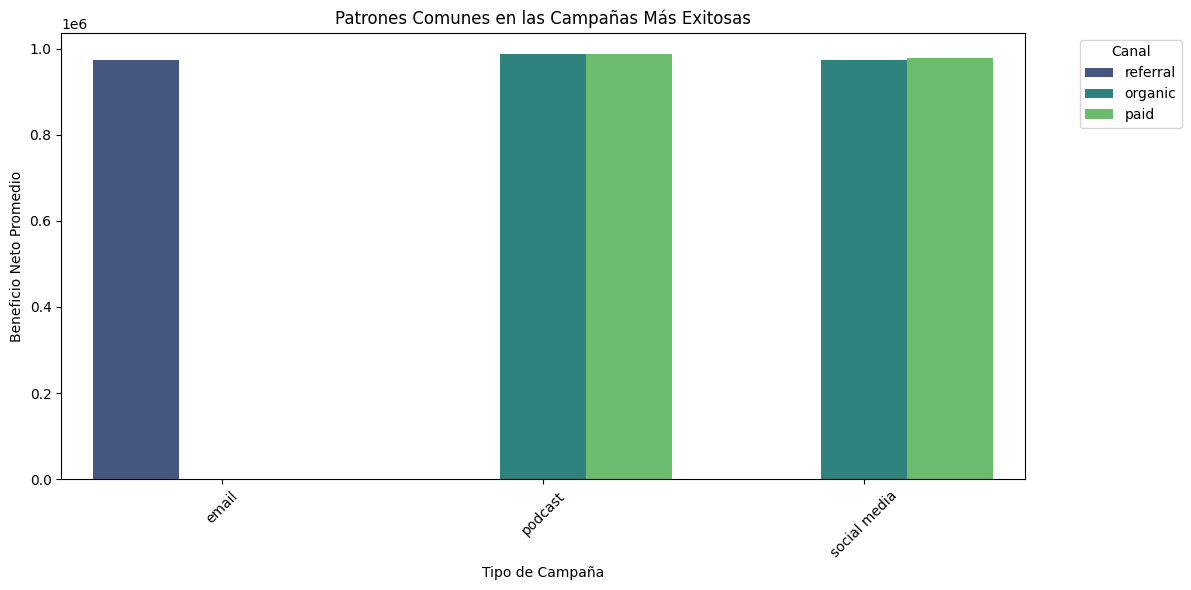

In [12]:
# Ranking de campañas según beneficio neto
top_campaigns = df.sort_values(by='net_profit', ascending=False).head(5)

# Mostrar las campañas más exitosas
print("Top 10 campañas según beneficio neto:")
print(top_campaigns[['campaign_name', 'net_profit', 'type', 'channel', 'target_audience', 'roi', 'conversion_rate']])

# Analizar patrones comunes
common_patterns = top_campaigns.groupby(['type', 'channel', 'target_audience']).agg({
    'net_profit': 'mean',
    'roi': 'mean',
    'conversion_rate': 'mean',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Mostrar patrones comunes
print("\nPatrones comunes en las campañas más exitosas:")
print(common_patterns)

# Visualizar los patrones comunes
plt.figure(figsize=(12, 6))
sns.barplot(data=common_patterns, x='type', y='net_profit', hue='channel', palette='viridis')
plt.title('Patrones Comunes en las Campañas Más Exitosas')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Beneficio Neto Promedio')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?

Correlación entre presupuesto e ingresos: -0.02


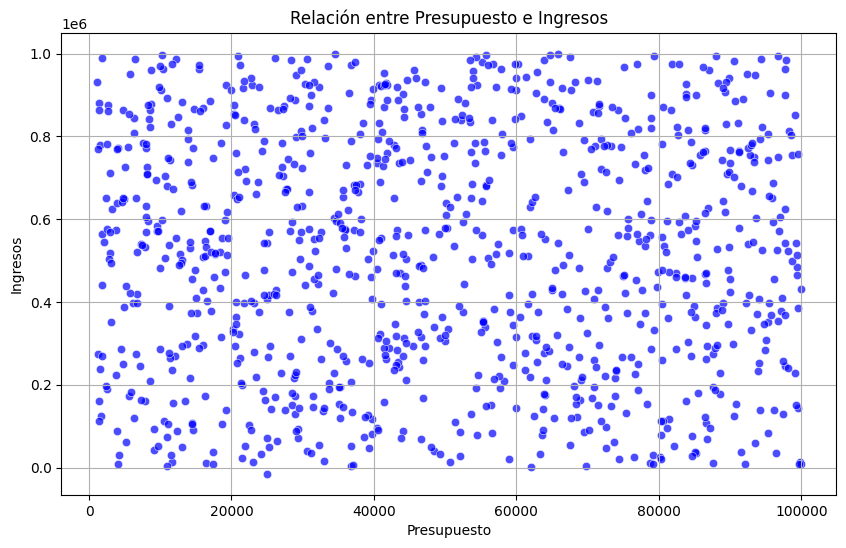

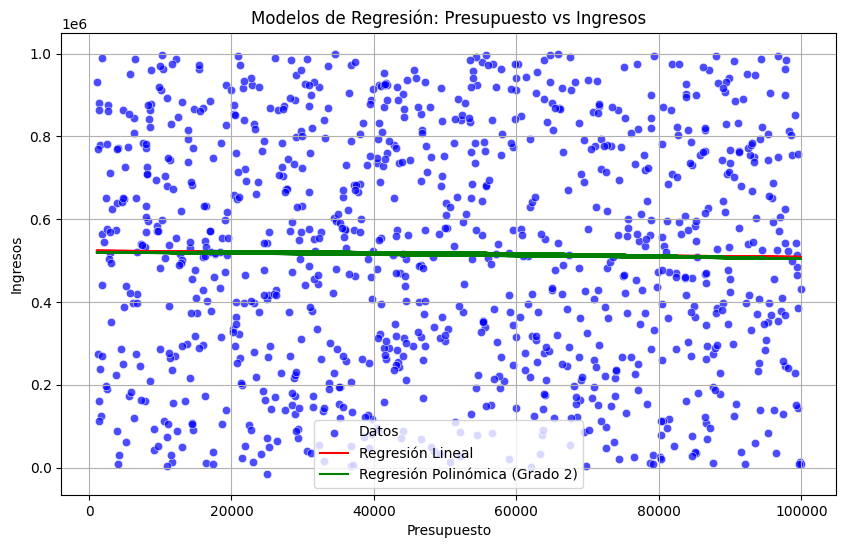

R² del modelo lineal: 0.00
R² del modelo polinómico (grado 2): 0.00


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Calcular la correlación entre presupuesto e ingresos
correlation = df['budget'].corr(df['revenue'])
print(f"Correlación entre presupuesto e ingresos: {correlation:.2f}")

# Visualizar la relación entre presupuesto e ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7, color='blue')
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Ajustar un modelo de regresión lineal
X = df[['budget']]
y = df['revenue']
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Ajustar un modelo de regresión polinómica (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Visualizar los modelos ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7, color='blue', label='Datos')
plt.plot(df['budget'], y_pred_linear, color='red', label='Regresión Lineal')
plt.plot(df['budget'], y_pred_poly, color='green', label='Regresión Polinómica (Grado 2)')
plt.title('Modelos de Regresión: Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.legend()
plt.grid(True)
plt.show()

# Evaluar los modelos
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)
print(f"R² del modelo lineal: {r2_linear:.2f}")
print(f"R² del modelo polinómico (grado 2): {r2_poly:.2f}")

¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?

In [14]:
# Filtrar campañas con ROI > 0.5 e ingresos > 500,000
filtered_campaigns = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Analizar características comunes
common_features = filtered_campaigns.groupby(['type', 'channel', 'target_audience']).agg({
    'roi': 'mean',
    'revenue': 'mean',
    'net_profit': 'mean',
    'conversion_rate': 'mean',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Mostrar las campañas filtradas
print("Campañas filtradas:")
print(filtered_campaigns[['campaign_name', 'roi', 'revenue', 'type', 'channel', 'target_audience']])

# Mostrar características comunes
print("\nCaracterísticas comunes de las campañas filtradas:")
print(common_features)

# Crear un sistema de clasificación basado en múltiples criterios
def classify_campaign(row):
    if row['roi'] > 0.7 and row['conversion_rate'] > 0.6:
        return 'Excelente'
    elif row['roi'] > 0.6 and row['conversion_rate'] > 0.5:
        return 'Buena'
    elif row['roi'] > 0.5 and row['conversion_rate'] > 0.4:
        return 'Regular'
    else:
        return 'Mejorable'

filtered_campaigns['classification'] = filtered_campaigns.apply(classify_campaign, axis=1)

# Mostrar las campañas clasificadas
print("\nCampañas clasificadas:")
print(filtered_campaigns[['campaign_name', 'roi', 'revenue', 'conversion_rate', 'classification']])

Campañas filtradas:
                                    campaign_name   roi    revenue  \
1              De-engineered analyzing task-force  0.74  516609.10   
5          Upgradable transitional data-warehouse  0.59  558302.11   
9                    Intuitive responsive support  0.81  563280.30   
12                  Networked even-keeled toolset  0.58  680416.90   
21    Self-enabling human-resource infrastructure  0.69  974038.96   
...                                           ...   ...        ...   
993                Intuitive 4thgeneration access  0.78  702414.14   
995          Switchable solution-oriented success  0.96  601987.53   
996     Multi-channeled 5thgeneration methodology  0.90  537274.20   
998                   Operative tangible firmware  0.80  613448.30   
1000       Upgradable transitional data-warehouse  0.59  558302.11   

              type    channel target_audience  
1            email  promotion             B2C  
5     social media   referral             B

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\57333721.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_campaigns['classification'] = filtered_campaigns.apply(classify_campaign, axis=1)


¿Existen patrones estacionales o temporales en el rendimiento de las campañas?

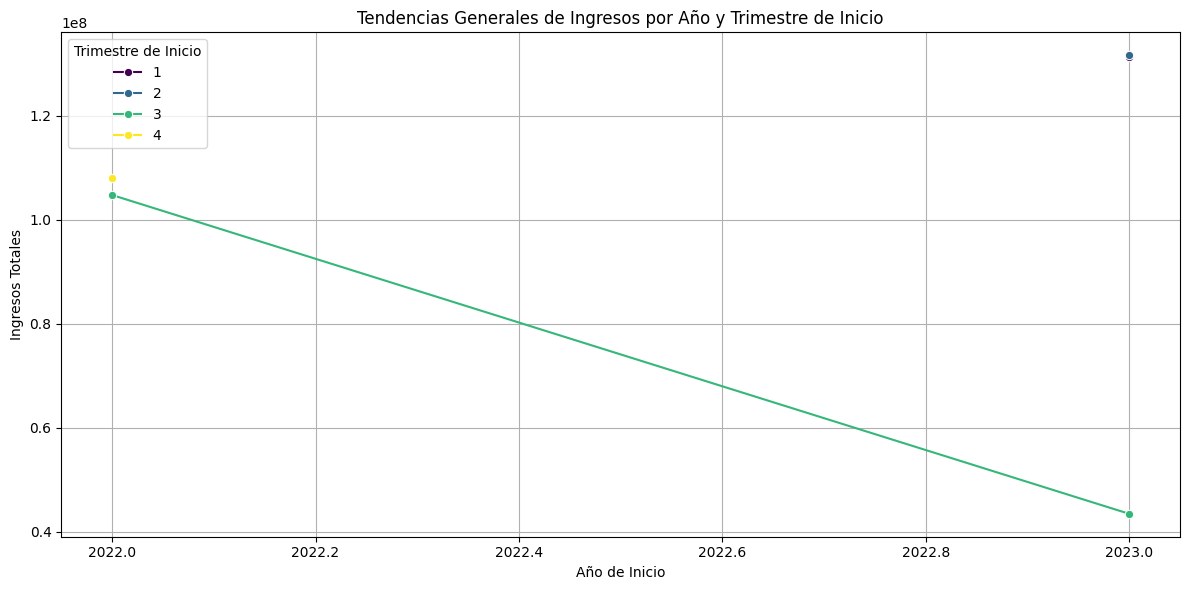

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_24060\4269629904.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes_inicio', y='revenue', data=seasonal_analysis, palette='viridis', ax=ax1)


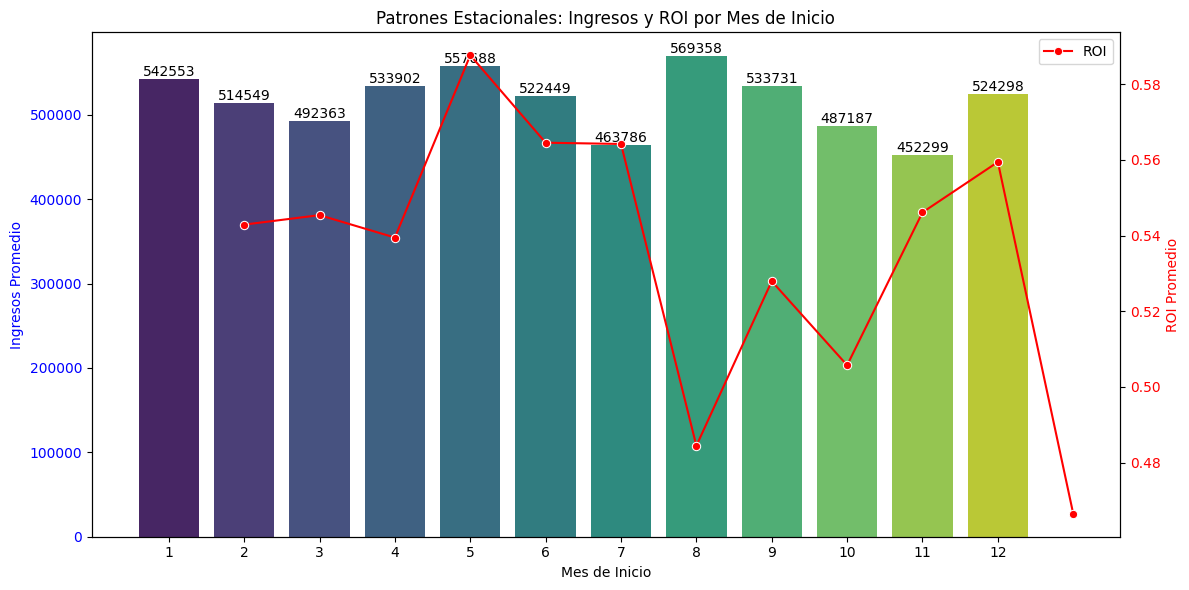

Tendencias Generales:
   año_inicio  trimestre_inicio       revenue       roi  conversion_rate
0        2022                 3  1.047695e+08  0.518063         0.515550
1        2022                 4  1.080962e+08  0.527085         0.524888
2        2023                 1  1.313264e+08  0.542244         0.576063
3        2023                 2  1.316622e+08  0.572816         0.539061
4        2023                 3  4.343720e+07  0.482717         0.571087

Patrones Estacionales:
    mes_inicio        revenue       roi  conversion_rate
0            1  542553.360206  0.542887         0.618969
1            2  514548.577460  0.545397         0.493968
2            3  492363.357979  0.539468         0.586809
3            4  533901.757191  0.587640         0.539775
4            5  557688.006667  0.564533         0.521467
5            6  522448.931481  0.564198         0.554568
6            7  463786.211889  0.484444         0.565778
7            8  569358.412371  0.527938         0.533196
8  

In [15]:
# Agrupar por año de inicio y trimestre de inicio para analizar tendencias generales
trend_analysis = df.groupby(['año_inicio', 'trimestre_inicio']).agg({
    'revenue': 'sum',
    'roi': 'mean',
    'conversion_rate': 'mean'
}).reset_index()

# Visualizar tendencias generales
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_analysis, x='año_inicio', y='revenue', hue='trimestre_inicio', marker='o', palette='viridis')
plt.title('Tendencias Generales de Ingresos por Año y Trimestre de Inicio')
plt.xlabel('Año de Inicio')
plt.ylabel('Ingresos Totales')
plt.legend(title='Trimestre de Inicio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analizar patrones estacionales por mes de inicio
seasonal_analysis = df.groupby('mes_inicio').agg({
    'revenue': 'mean',
    'roi': 'mean',
    'conversion_rate': 'mean'
}).reset_index()

# Visualizar patrones estacionales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para ingresos promedio por mes de inicio
sns.barplot(x='mes_inicio', y='revenue', data=seasonal_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Ingresos Promedio', color='blue')
ax1.set_xlabel('Mes de Inicio')
ax1.set_title('Patrones Estacionales: Ingresos y ROI por Mes de Inicio')
ax1.tick_params(axis='y', labelcolor='blue')
for i in ax1.containers:
    ax1.bar_label(i,)

# Gráfico de línea para ROI promedio por mes de inicio
ax2 = ax1.twinx()
sns.lineplot(x='mes_inicio', y='roi', data=seasonal_analysis, marker='o', color='red', label='ROI', ax=ax2)
ax2.set_ylabel('ROI Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar las tablas de análisis
print("Tendencias Generales:")
print(trend_analysis)
print("\nPatrones Estacionales:")
print(seasonal_analysis)
